# Histogram Model Demonstration

This notebook will show how the OpenOceans psuedowaveform model can be used for bathymetric analysis.

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# adding the open oceans folder to the import path
# shouldnt be needed once pypi configured
import sys
sys.path.append('..')

# import the open oceans module
import openoceans as oo

## Loading photon data

In [ ]:
# load in an h5 file and extract pseudowaveforms from a spot or two along track

## Extracting pseudowaveform

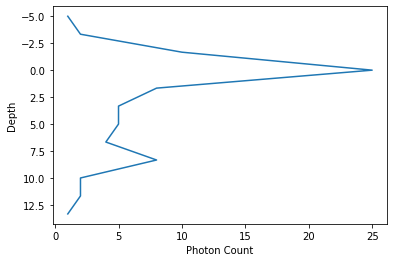

In [3]:
# making a fake wavefrom for now

# increasing in depth, decreasing in elevation
hist = np.array([1, 2, 10, 25, 8, 5, 5, 4, 8, 2, 2, 1])
# 25 value is the surface return
# 8 value is the seafloor return

# depth bins increasing L-R
depth_bin_edges = np.linspace(-5, 15, len(hist)+1)

# quick viz
plt.figure()
plt.plot(hist, depth_bin_edges[:-1])
plt.ylabel('Depth')
plt.xlabel('Photon Count')
plt.gca().invert_yaxis() # flip y axis for depth to make sense

## Modeling pseudowaveform

Waveform objects can be created from photon data histgrams and the corresponding histogram bins.

In [6]:
pwave = oo.Waveform(hist, depth_bin_edges)

Use print() to show a quick text summary of the waveform statistics.

In [7]:
print(pwave)

----- PSEUDOWAVEFORM -----
TOTAL PHOTONS: 73
Depth Range : [-5.00m, 15.00m]
Depth Bin Count : 12
Peak Count : 2
Parameter Quality Flag : 3
Fitted? : False

Initial Parameter Estimates:
    Surface Peak Location : 0.83m
    Bathy Peak Location : 9.17m
    Surface/Bathy Peak Ratio : 6.25
        


When the Waveform class is initialized, an estimate of model parameters is automatically calculated for whatever data is input. We can get a quick visualization of this model using the show() method.

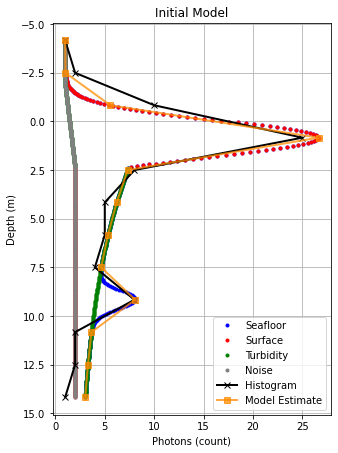

In [10]:
f = pwave.show()

The plot above shows model components for noise, surface returns, turbidity, and seafloor returns. These components are combined into the overall model (shown in orange).

Model components can also be accessed programmatically.

In [11]:
pwave.params

,initial,fitted
surf_prom,25.000000,NaN
surf_loc,0.833333,NaN
surf_std,0.890001,NaN
decay_param,-0.141001,NaN
turb_intens,5.397245,NaN
noise_above,1.000000,NaN
noise_below,2.000000,NaN
bathy_prom,4.000000,NaN
bathy_loc,9.166667,NaN
bathy_std,0.472813,NaN


We can see the parameters used to reconstruct the waveform, including surface peak depth (surf_loc), bathy peak prominence (bathy_prom) and more. The fitted column will be used in the next section.


The modeled histogram is also available. It can be accessed at the original depth resolution, or at an interpolated depth resolution (approximately 0.05 m). The interpolated resolution model is used with Waveform.show() to plot the model components (noise, seafloor, etc), while the original depth resolution is shown in orange.

## Fitting model

## Scene Reconstruction

## Bathymetric extraction